## Notebook setup

In [119]:
import os
import io
import warnings
import datetime
import numpy as np
import base64
import dotenv

import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline

from IPython.display import HTML

from openbb_terminal.reports import widget_helpers as widgets
from openbb_terminal.sdk import openbb
from openbb_terminal import config_terminal as cfg
from openbb_terminal.helper_classes import TerminalStyle
from openbb_terminal.core.config.paths import USER_ENV_FILE, REPOSITORY_DIRECTORY
import yfinance as yf

from jinja2 import Template

%matplotlib inline
matplotlib_inline.backend_inline.set_matplotlib_formats("svg")
warnings.filterwarnings("ignore")

# Detect if prediction capabilities are present. If they are not, disable prediction in the rest of the script
# so that the report can still be generated without prediction results.
# predictions = True
# try:
#     openbb.stocks.pred.models
# except Exception as e:
#     predictions = False

# TODO Fix predictions virtual path on api refactored

predictions = False

In [120]:
cfg.theme = TerminalStyle("light", "light", "light")

stylesheet = widgets.html_report_stylesheet()

## Select symbol

In [121]:
# Parameters that will be replaced when calling this notebook
# Do not leave parameters blank as notebook will not run otherwise
symbol = "FLNG"
long_name = "Flex LNG"
report_name = f"{symbol}"
 

In [122]:
if "." in symbol:
    import sys

    sys.exit(0)
symbol = symbol.upper()

In [123]:
ticker_data = openbb.stocks.load(
    symbol=symbol, start_date=datetime.datetime.now() - datetime.timedelta(days=18 * 30)
)
ticker_data = openbb.stocks.process_candle(data=ticker_data)

author = ""
report_title = f"Investment Research Report on {symbol.upper()}"
report_date = datetime.datetime.now().strftime("%d %B, %Y")
report_time = datetime.datetime.now().strftime("%H:%M")
report_timezone = datetime.datetime.now(datetime.timezone.utc).astimezone().tzinfo
report_title, report_date, report_time, report_timezone

Loading Daily data for EPD with starting period 2021-07-20.

('Investment Research Report on EPD',
 '11 January, 2023',
 '15:56',
 datetime.timezone(datetime.timedelta(days=-1, seconds=68400), 'Eastern Standard Time'))

## Data

In [124]:
(
    df_year_estimates,
    df_quarter_earnings,
    df_quarter_revenues,
) = openbb.stocks.dd.est(symbol=symbol)
df_quarter_revenues

,Previous Quarter,Current Quarter,Next Quarter,Current Year,Next Year
QUARTER REVENUES ESTIMATES,,,,,
Date,ending 12/31/22,ending 03/31/23,ending 06/30/23,ending 12/31/23,ending 12/31/24
No. of Analysts,7,5,5,12,9
Average Estimate,"15,250 USD","15,361 USD","16,217 USD","61,013 USD","61,759 USD"
Year Ago,"11,370 USD","13,008 USD","16,060 USD",-,"61,013 USD"
Publish Date,2/1/2023,5/1/2023,8/2/2023,-,-


In [125]:
display_year = sorted(df_year_estimates.columns.tolist())[:3]
df_year_estimates = df_year_estimates[display_year].head(5)

In [126]:
tables = openbb.etf.news(f"{long_name}", 10)
for table in tables:
    table[0].loc["link"] = (
        table[0].loc["link"].apply(lambda x: f'<a href="{x}">{x}</a>')
    )

416 news articles for  Enterprise Products Partners were found since 2023-01-04

In [127]:
df_institutional_shareholders = openbb.stocks.fa.shrs(symbol, holder="institutional")
df_institutional_shareholders.index += 1
df_institutional_shareholders

,Holder,Shares,Date Reported,Stake,Value
1,Blackstone Inc,48.294 M,2022-09-29,2.22 %,1.233 B
2,Marquard & Bahls Ag,36.947 M,2022-09-29,1.70 %,943.263 M
3,Blackrock Inc.,25.604 M,2022-09-29,1.18 %,653.665 M
4,Alps Advisors Inc.,25.477 M,2022-09-29,1.17 %,650.425 M
5,"Neuberger Berman Group, LLC",19.014 M,2022-09-29,0.87 %,485.437 M
6,Morgan Stanley,17.642 M,2022-09-29,0.81 %,450.409 M
7,Goldman Sachs Group Inc,16.351 M,2022-09-29,0.75 %,417.442 M
8,"Sarofim, Fayez",15.969 M,2022-09-29,0.73 %,407.677 M
9,"Energy Income Partners, LLC",14.702 M,2022-09-29,0.68 %,375.334 M
10,"American Century Companies, Inc.",14.018 M,2022-09-29,0.64 %,357.891 M


In [128]:
openbb.stocks.fa.shrs(symbol)

,Holder,Shares,Date Reported,Stake,Value
0,Blackstone Inc,48.294 M,2022-09-29,2.22 %,1.233 B
1,Marquard & Bahls Ag,36.947 M,2022-09-29,1.70 %,943.263 M
2,Blackrock Inc.,25.604 M,2022-09-29,1.18 %,653.665 M
3,Alps Advisors Inc.,25.477 M,2022-09-29,1.17 %,650.425 M
4,"Neuberger Berman Group, LLC",19.014 M,2022-09-29,0.87 %,485.437 M
5,Morgan Stanley,17.642 M,2022-09-29,0.81 %,450.409 M
6,Goldman Sachs Group Inc,16.351 M,2022-09-29,0.75 %,417.442 M
7,"Sarofim, Fayez",15.969 M,2022-09-29,0.73 %,407.677 M
8,"Energy Income Partners, LLC",14.702 M,2022-09-29,0.68 %,375.334 M
9,"American Century Companies, Inc.",14.018 M,2022-09-29,0.64 %,357.891 M


In [129]:
df_institutional_shareholders = openbb.stocks.fa.shrs(symbol)
df_institutional_shareholders.index += 1
df_institutional_shareholders

,Holder,Shares,Date Reported,Stake,Value
1,Blackstone Inc,48.294 M,2022-09-29,2.22 %,1.233 B
2,Marquard & Bahls Ag,36.947 M,2022-09-29,1.70 %,943.263 M
3,Blackrock Inc.,25.604 M,2022-09-29,1.18 %,653.665 M
4,Alps Advisors Inc.,25.477 M,2022-09-29,1.17 %,650.425 M
5,"Neuberger Berman Group, LLC",19.014 M,2022-09-29,0.87 %,485.437 M
6,Morgan Stanley,17.642 M,2022-09-29,0.81 %,450.409 M
7,Goldman Sachs Group Inc,16.351 M,2022-09-29,0.75 %,417.442 M
8,"Sarofim, Fayez",15.969 M,2022-09-29,0.73 %,407.677 M
9,"Energy Income Partners, LLC",14.702 M,2022-09-29,0.68 %,375.334 M
10,"American Century Companies, Inc.",14.018 M,2022-09-29,0.64 %,357.891 M


In [130]:
df_sec_filings = openbb.stocks.dd.sec(symbol=symbol)[["Type", "Category", "Link"]].head(
    5
)
df_sec_filings["Link"] = df_sec_filings["Link"].apply(
    lambda x: f'<a href="{x}">{x}</a>'
)
df_sec_filings

,Type,Category,Link
Filing Date,,,
01/10/2023,8-K,Special Events,"<a href=""https://www.marketwatch.com/investing/stock/epd/financials/secfilings?docid=16309315"">https://www.marketwatch.com/investing/stock/epd/financials/secfilings?docid=16309315</a>"
01/05/2023,8-K,Special Events,"<a href=""https://www.marketwatch.com/investing/stock/epd/financials/secfilings?docid=16301099"">https://www.marketwatch.com/investing/stock/epd/financials/secfilings?docid=16301099</a>"
12/29/2022,8-K,Special Events,"<a href=""https://www.marketwatch.com/investing/stock/epd/financials/secfilings?docid=16284918"">https://www.marketwatch.com/investing/stock/epd/financials/secfilings?docid=16284918</a>"
11/22/2022,S-8,Registration Statement,"<a href=""https://www.marketwatch.com/investing/stock/epd/financials/secfilings?docid=16218957"">https://www.marketwatch.com/investing/stock/epd/financials/secfilings?docid=16218957</a>"
11/22/2022,S-8,Registration Statement,"<a href=""https://www.marketwatch.com/investing/stock/epd/financials/secfilings?docid=16218925"">https://www.marketwatch.com/investing/stock/epd/financials/secfilings?docid=16218925</a>"


In [131]:
df_analyst = openbb.stocks.dd.analyst(symbol=symbol)

Error: "None of ['date'] are in the columns"

In [132]:
df_rating = openbb.stocks.dd.rating(symbol)
df_rating

,Rating,DCF,ROE,ROA,DE,PE,PB
date,,,,,,,
2022-11-11,Buy,Strong Buy,Neutral,Neutral,Neutral,Strong Buy,Strong Buy
2022-11-10,Buy,Strong Buy,Neutral,Neutral,Neutral,Strong Buy,Strong Buy
2022-11-09,Buy,Strong Buy,Neutral,Neutral,Neutral,Strong Buy,Strong Buy
2022-11-08,Buy,Strong Buy,Neutral,Neutral,Neutral,Strong Buy,Strong Buy
2022-11-07,Buy,Strong Buy,Neutral,Neutral,Neutral,Strong Buy,Strong Buy


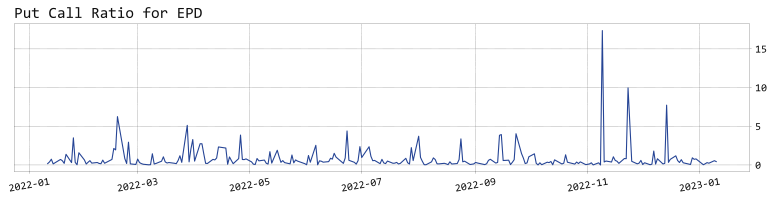

In [133]:
fig, ax = plt.subplots(figsize=(11, 3), dpi=150)
openbb.stocks.options.pcr_chart(
    symbol,
    window=30,
    external_axes=[
        ax,
    ],
)
fig.tight_layout()
f = io.BytesIO()
fig.savefig(f, format="svg")
pcr_chart = f.getvalue().decode("utf-8")

In [134]:
expiry_dates = openbb.stocks.options.expirations(symbol)
exp = expiry_dates[0]
option_chain = openbb.stocks.options.chains(symbol, expiration=exp)


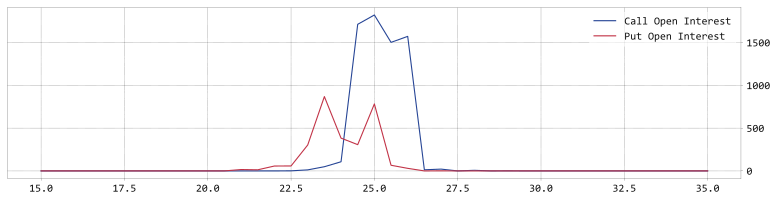

In [135]:
fig, ax = plt.subplots(figsize=(11, 3), dpi=150)
ax.plot(
    option_chain["strike"], option_chain["c_Openinterest"], label="Call Open Interest"
)
ax.plot(
    option_chain["strike"], option_chain["p_Openinterest"], label="Put Open Interest"
)
ax.legend()
fig.tight_layout()
f = io.BytesIO()
fig.savefig(f, format="svg")
vol_chart = f.getvalue().decode("utf-8")

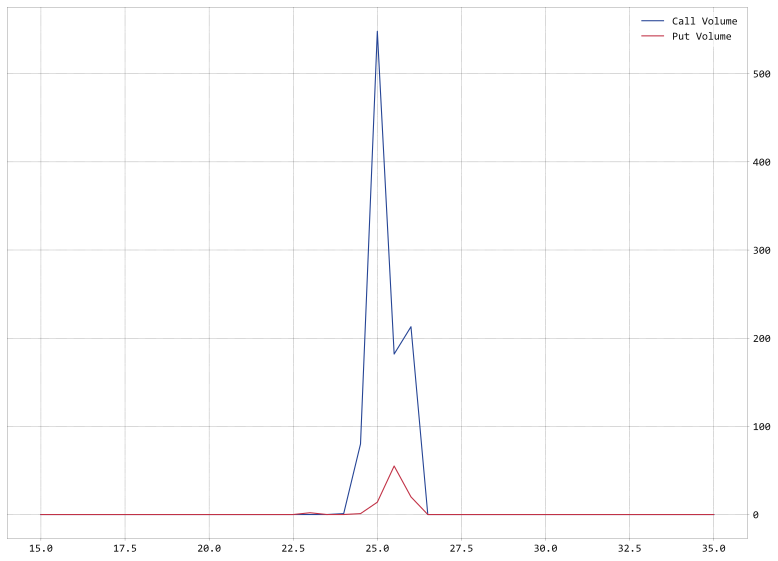

In [136]:
fig, ax = plt.subplots(figsize=(11, 8), dpi=150)
ax.plot(option_chain["strike"], option_chain["c_Volume"], label="Call Volume")
ax.plot(option_chain["strike"], option_chain["p_Volume"], label="Put Volume")
ax.legend()
fig.tight_layout()
f = io.BytesIO()
fig.savefig(f, format="svg")
voi_chart = f.getvalue().decode("utf-8")

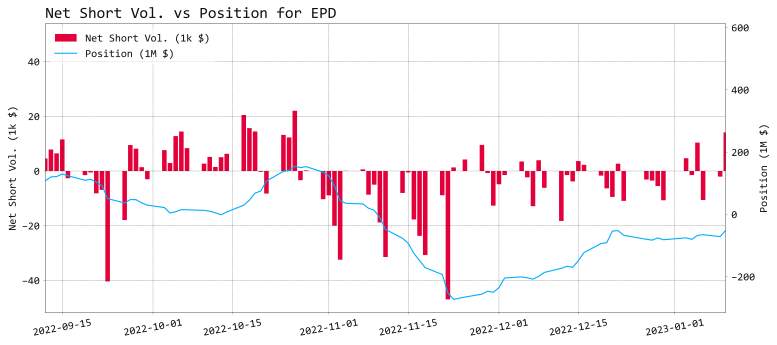

In [137]:
fig, ax1 = plt.subplots(figsize=(11, 5), dpi=150)
ax2 = ax1.twinx()
openbb.stocks.dps.spos_chart(
    symbol=symbol,
    limit=84,
    raw=False,
    export="",
    external_axes=[ax1, ax2],
)
fig.tight_layout()

f = io.BytesIO()
fig.savefig(f, format="svg")
net_short_position = f.getvalue().decode("utf-8")

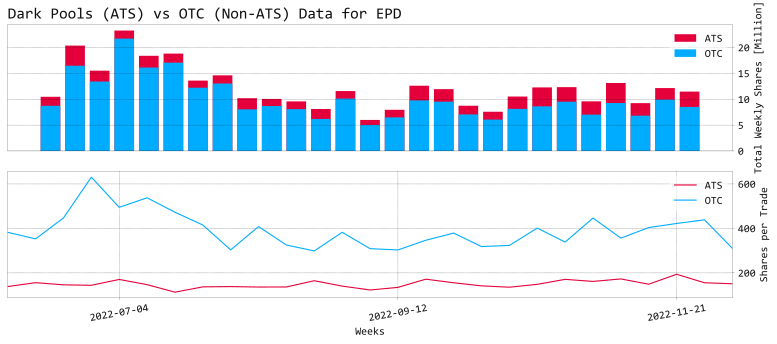

In [138]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(11, 5), dpi=150)
openbb.stocks.dps.dpotc_chart(symbol=symbol, external_axes=[ax1, ax2])
fig.tight_layout()

f = io.BytesIO()
fig.savefig(f, format="svg")
dark_pools = f.getvalue().decode("utf-8")

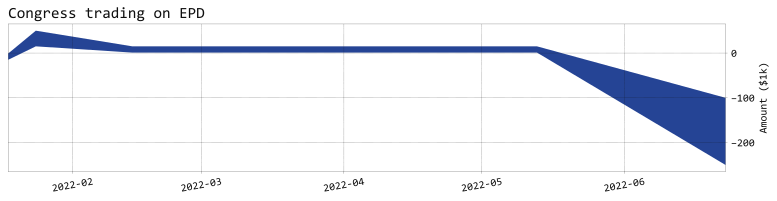

In [139]:
fig, ax = plt.subplots(figsize=(11, 3), dpi=150)
openbb.stocks.gov.gtrades_chart(
    symbol,
    past_transactions_months=12,
    external_axes=[
        ax,
    ],
)
fig.tight_layout()
f = io.BytesIO()
fig.savefig(f, format="svg")
gtrades_chart = f.getvalue().decode("utf-8")

No government contracts found

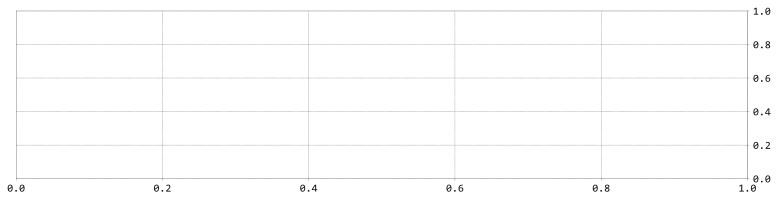

In [140]:
fig, ax = plt.subplots(figsize=(11, 3), dpi=150)
openbb.stocks.gov.contracts_chart(
    symbol,
    past_transaction_days=365,
    external_axes=[
        ax,
    ],
)
fig.tight_layout()
f = io.BytesIO()
fig.savefig(f, format="svg")
gov_contracts_chart = f.getvalue().decode("utf-8")

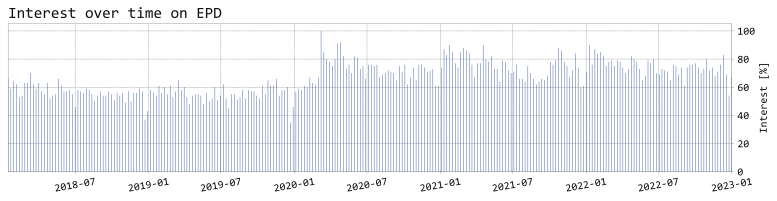

In [141]:
fig, ax = plt.subplots(figsize=(11, 3), dpi=150)
openbb.stocks.ba.mentions_chart(
    symbol,
    external_axes=[
        ax,
    ],
)
fig.tight_layout()
f = io.BytesIO()
fig.savefig(f, format="svg")
google_mentions_chart = f.getvalue().decode("utf-8")

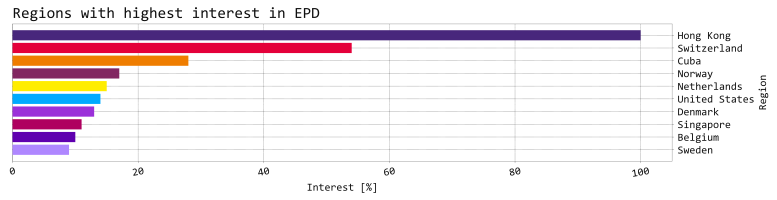

In [142]:
fig, ax = plt.subplots(figsize=(11, 3), dpi=150)
openbb.stocks.ba.regions_chart(
    symbol,
    limit=10,
    external_axes=[
        ax,
    ],
)
fig.tight_layout()
f = io.BytesIO()
fig.savefig(f, format="svg")
google_regions_chart = f.getvalue().decode("utf-8")


2 Failed downloads:
- EEP: No data found for this date range, symbol may be delisted
- APC: No data found, symbol may be delisted


NaN values found in: APC, EEP.  Backfilling data

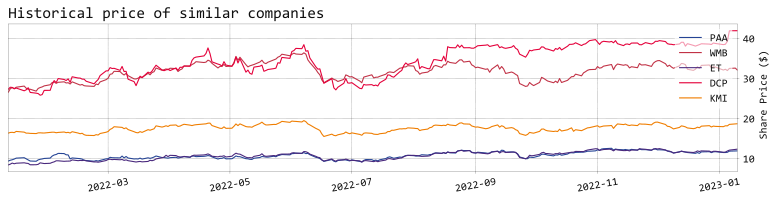

In [143]:
similar_companies=openbb.stocks.ca.similar(symbol,source="Polygon")
fig, ax = plt.subplots(figsize=(11, 3), dpi=150)
openbb.stocks.ca.hist_chart(
    similar_companies,
    external_axes=[
        ax,
    ],
    normalize=False,
)
fig.tight_layout()
f = io.BytesIO()
fig.savefig(f, format="svg")
historical_similar = f.getvalue().decode("utf-8")


2 Failed downloads:
- EEP: No data found for this date range, symbol may be delisted
- APC: No data found, symbol may be delisted


NaN values found in: APC, EEP.  Backfilling data

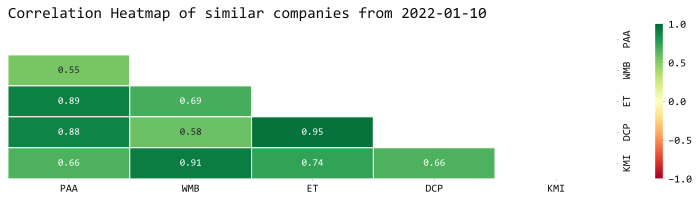

In [144]:
fig, ax = plt.subplots(figsize=(11, 3), dpi=150)
openbb.stocks.ca.hcorr_chart(
    similar_companies,
    external_axes=[
        ax,
    ],
)
fig.tight_layout()
f = io.BytesIO()
fig.savefig(f, format="svg")
hcorr_similar = f.getvalue().decode("utf-8")


2 Failed downloads:
- EEP: No data found for this date range, symbol may be delisted
- APC: No data found, symbol may be delisted


NaN values found in: APC, EEP.  Backfilling data

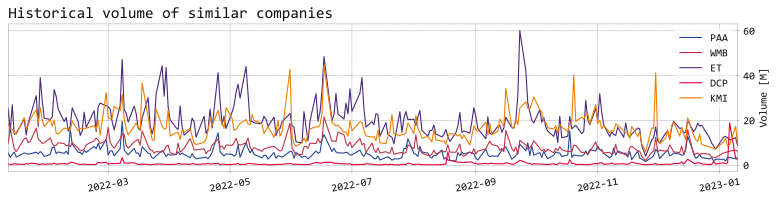

In [145]:
fig, ax = plt.subplots(figsize=(11, 3), dpi=150)
openbb.stocks.ca.volume_chart(
    similar_companies,
    external_axes=[
        ax,
    ],
)
fig.tight_layout()
f = io.BytesIO()
fig.savefig(f, format="svg")
vol_similar = f.getvalue().decode("utf-8")

Unexpected data format or no data from FinBrain API for APC

Unexpected data format or no data from FinBrain API for EEP

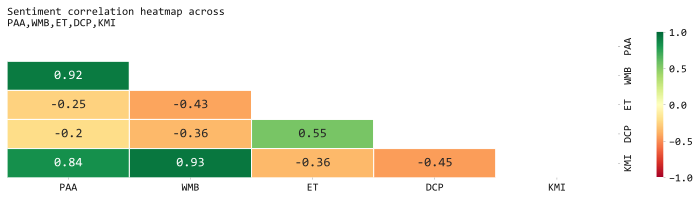

In [146]:
fig, ax = plt.subplots(figsize=(11, 3), dpi=150)
openbb.stocks.ca.scorr_chart(
    similar_companies,
    external_axes=[
        ax,
    ],
)
fig.tight_layout()
f = io.BytesIO()
fig.savefig(f, format="svg")
scorr_similar = f.getvalue().decode("utf-8")

In [147]:
income_comparison = openbb.stocks.ca.income(similar_companies)
income_comparison

Error: Timeframe selected should be one of 2017, 2018, 2019, 2020, 2021

[]

In [148]:
try:
    df_related_queries = openbb.stocks.ba.queries(symbol)
    df_related_queries.index += 1
    df_related_queries.index
except:
    pass

In [149]:
try:
    df_rising_queries = openbb.stocks.ba.rise(symbol)
    df_rising_queries.index += 1
    df_rising_queries
except:
    pass

No quarterly government contracts found

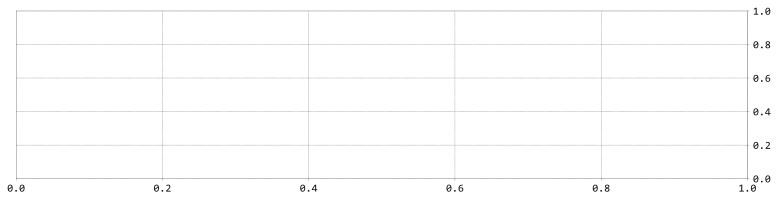

In [150]:
fig, ax = plt.subplots(figsize=(11, 3), dpi=150)
openbb.stocks.gov.histcont_chart(
    symbol,
    external_axes=[
        ax,
    ],
)
fig.tight_layout()
f = io.BytesIO()
fig.savefig(f, format="svg")
gov_histcont_chart = f.getvalue().decode("utf-8")

In [151]:
df_lobbying = openbb.stocks.gov.lobbying(symbol, limit=5)
df_lobbying

No corporate lobbying found

""


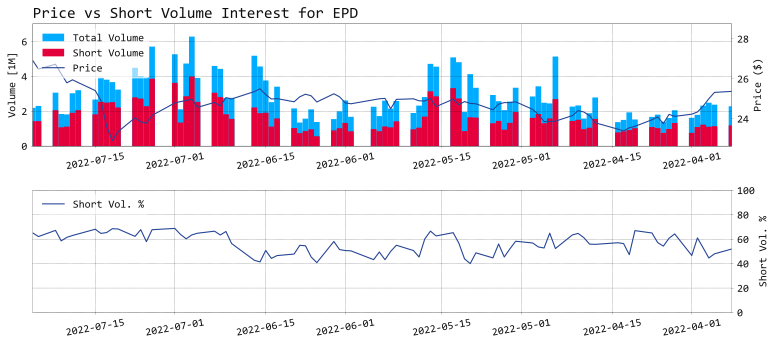

In [152]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(11, 5), dpi=150)
ax3 = ax1.twinx()
openbb.stocks.dps.psi_sg_chart(
    symbol=symbol,
    external_axes=[ax1, ax2, ax3],
)
fig.tight_layout()

f = io.BytesIO()
fig.savefig(f, format="svg")
price_vs_short_interest = f.getvalue().decode("utf-8")

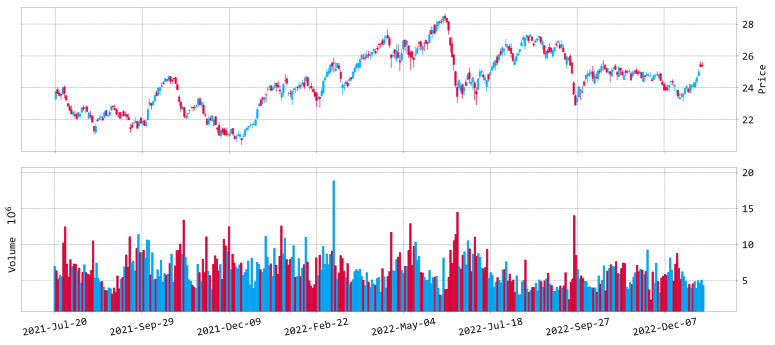

In [153]:
fig, (candles, volume) = plt.subplots(nrows=2, ncols=1, figsize=(11, 5), dpi=150)
openbb.stocks.candle(
    symbol=symbol,
    data=ticker_data,
    use_matplotlib=True,
    external_axes=[candles, volume],
)
candles.set_xticklabels("")
fig.tight_layout()

f = io.BytesIO()
fig.savefig(f, format="svg")
price_chart = f.getvalue().decode("utf-8")

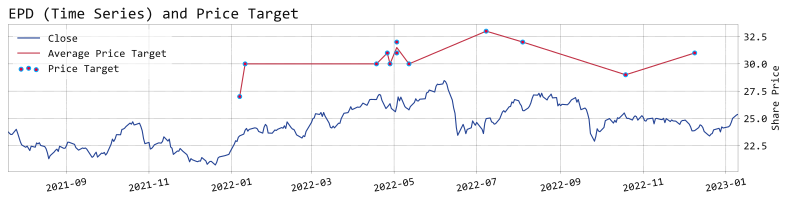

In [154]:
fig, ax = plt.subplots(figsize=(11, 3), dpi=150)
openbb.stocks.dd.pt_chart(
    symbol=symbol,
    start_date="2022-01-01",
    data=ticker_data,
    limit=10,
    raw=False,
    external_axes=[ax],
)
fig.tight_layout()
f = io.BytesIO()
fig.savefig(f, format="svg")
price_target_chart = f.getvalue().decode("utf-8")

In [155]:
df = openbb.stocks.dd.pt(symbol=symbol)
avg_ratings_last_30_days = 0
days = 0
if not df.empty:
    df_ratings = df[datetime.datetime.now() - datetime.timedelta(days=days) :]
    while df_ratings.empty:
        days += 30
        df_ratings = df[datetime.datetime.now() - datetime.timedelta(days=days) :]

        if days > 100:
            break

    if not df_ratings.empty:
        avg_ratings_last_30_days = round(np.mean(df_ratings["Price Target"].values), 2)
    else:
        avg_ratings = 0

last_price = round(ticker_data["Close"][-1], 2)

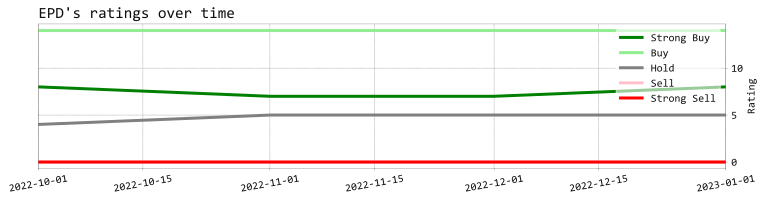

In [156]:
fig, ax = plt.subplots(figsize=(11, 3), dpi=150)
openbb.stocks.dd.rot_chart(
    symbol=symbol,
    limit=10,
    raw=False,
    export="",
    external_axes=[ax],
)
fig.tight_layout()
f = io.BytesIO()
fig.savefig(f, format="svg")
ratings_over_time_chart = f.getvalue().decode("utf-8")

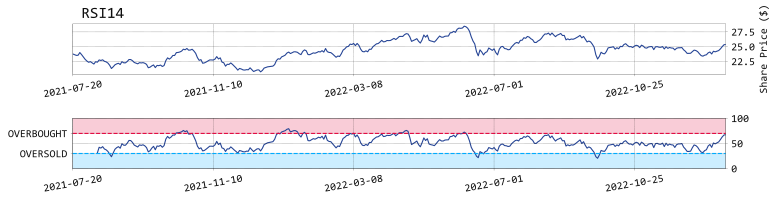

In [157]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(11, 3), dpi=150)
openbb.ta.rsi_chart(ticker_data["Close"], external_axes=[ax1, ax2])
fig.tight_layout()
f = io.BytesIO()
fig.savefig(f, format="svg")
ta_rsi = f.getvalue().decode("utf-8")

In [158]:
df = openbb.ta.rsi(ticker_data["Close"])
rsi_value = round(df.values[-1][0], 2)
rsi_value

67.37

In [159]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(
    np.array(range(len(ticker_data["Close"][-30:].index))).reshape(-1, 1),
    ticker_data["Close"][-30:].values,
)
regression_slope = round(model.coef_[0], 2)

In [160]:
import pandas as pd

df_insider = pd.DataFrame.from_dict(openbb.stocks.ins.lins(symbol=symbol)).head(10)
if (df_insider.empty):
    print("empty")
    last_10_insider_trading = 0
else:
    df_insider["Val ($)"] = df_insider["Value ($)"].replace({",": ""}, regex=True)
    df_insider["Trade"] = df_insider.apply(
        lambda row: (-1 * float(row["Val ($)"]))
        if row["Transaction"] == "Sale"
        else (float(row["Val ($)"]) if row["Transaction"] == "Buy" else 0),
        axis=1,
    )
    last_10_insider_trading = round(sum(df_insider["Trade"]) / 1_000_000, 2)
    df_insider = df_insider.drop(columns=["Val ($)", "Trade"])
    df_insider

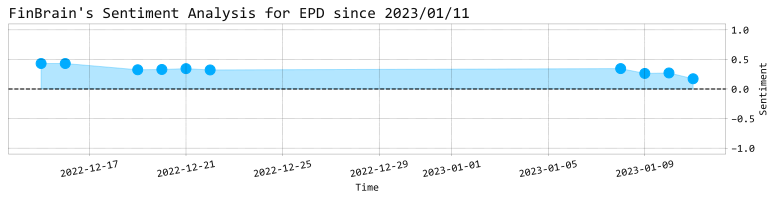

In [161]:
fig, ax = plt.subplots(figsize=(11, 3), dpi=150)
openbb.stocks.ba.headlines_chart(symbol=symbol, external_axes=[ax])
fig.tight_layout()
f = io.BytesIO()
fig.savefig(f, format="svg")
finbrain_sentiment = f.getvalue().decode("utf-8")

In [162]:
df_sentiment_finbrain = openbb.stocks.ca.sentiment(symbols=[symbol])
# comment out
#finbrain_sentiment_val = float(df_sentiment_finbrain.values[-1][0])
finbrain_sentiment_val = 0

In [163]:
(
    watchlist_count,
    n_cases,
    n_bull,
    n_bear,
) = openbb.stocks.ba.bullbear(symbol=symbol)
stocktwits_sentiment = f"Watchlist count: {watchlist_count}</br>"
if n_cases > 0:
    stocktwits_sentiment += f"\nLast {n_cases} sentiment messages:</br>"
    stocktwits_sentiment += f"Bullish {round(100*n_bull/n_cases, 2)}%</br>"
    stocktwits_sentiment += f"Bearish {round(100*n_bear/n_cases, 2)}%"
else:
    stocktwits_sentiment += "No messages found"
stocktwits_sentiment

'Watchlist count: 8973</br>No messages found'

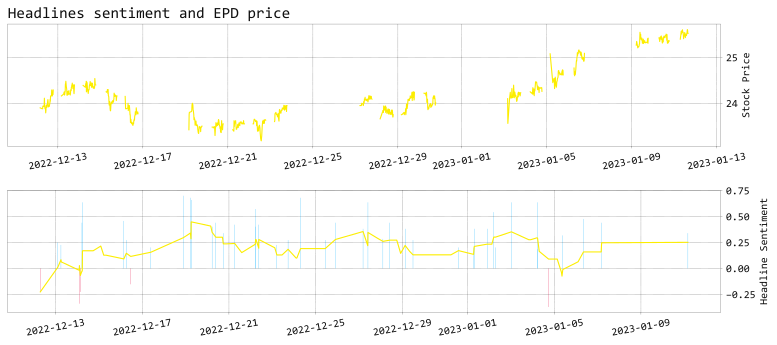

In [164]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(11, 5), dpi=150)
openbb.stocks.ba.snews_chart(symbol, external_axes=[ax1, ax2])
fig.tight_layout()
f = io.BytesIO()
fig.savefig(f, format="svg")
snews = f.getvalue().decode("utf-8")

In [165]:
ticker_data_all = openbb.stocks.load(
    symbol=symbol,
    start_date=datetime.datetime.now() - datetime.timedelta(days=5 * 12 * 21),
)
ticker_data_all["Returns"] = ticker_data_all["Adj Close"].pct_change()

Loading Daily data for EPD with starting period 2019-07-31.

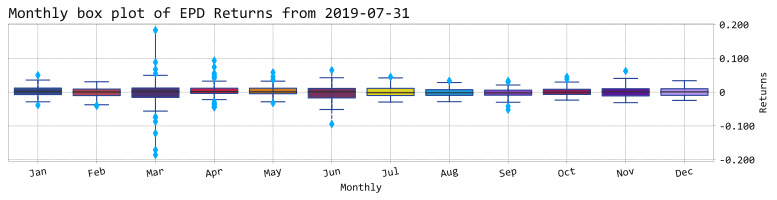

In [166]:
fig, ax = plt.subplots(figsize=(11, 3), dpi=150)
openbb.qa.bw(
    ticker_data_all,
    "Returns",
    symbol,
    yearly=False,
    external_axes=[ax],
)
fig.tight_layout()
f = io.BytesIO()
fig.savefig(f, format="svg")
bw_month = f.getvalue().decode("utf-8")

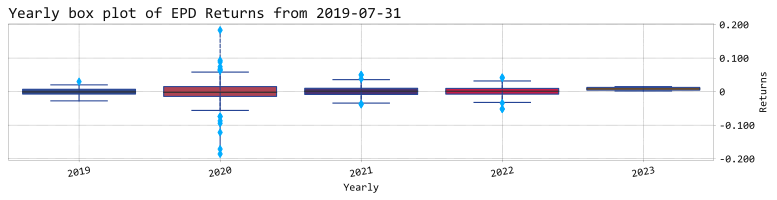

In [167]:
fig, ax = plt.subplots(figsize=(11, 3), dpi=150)
openbb.qa.bw(
    ticker_data_all,
    "Returns",
    symbol,
    yearly=True,
    external_axes=[ax],
)
fig.tight_layout()
f = io.BytesIO()
fig.savefig(f, format="svg")
bw_year = f.getvalue().decode("utf-8")

In [168]:
income_df = openbb.stocks.fa.income(symbol, source="YahooFinance")
income_df = income_df/1000000
income_df = income_df.applymap("${0:.0f}M".format)
data_df = openbb.stocks.fa.data(symbol)
mgmt_df = openbb.stocks.fa.mgmt(symbol)
if (mgmt_df.empty):
    print ("empty")
else:
    mgmt_df["Info"] = mgmt_df["Info"].apply(lambda x: f'<a href="{x}">{x}</a>')
    mgmt_df["Insider Activity"] = mgmt_df["Insider Activity"].apply(
        lambda x: f'<a href="{x}">{x}</a>' if x != "-" else x
    )
try:
    hist_dcf = openbb.stocks.fa.dcf(symbol)
except:
    pass
enterprise_df = openbb.stocks.fa.enterprise(symbol)
score = openbb.stocks.fa.score(symbol)
if score:
    score = round(float(score), 2)

No management information in Business Insider for EPD

empty


Ticker should be a NASDAQ 100 ticker or SP 500 ticker

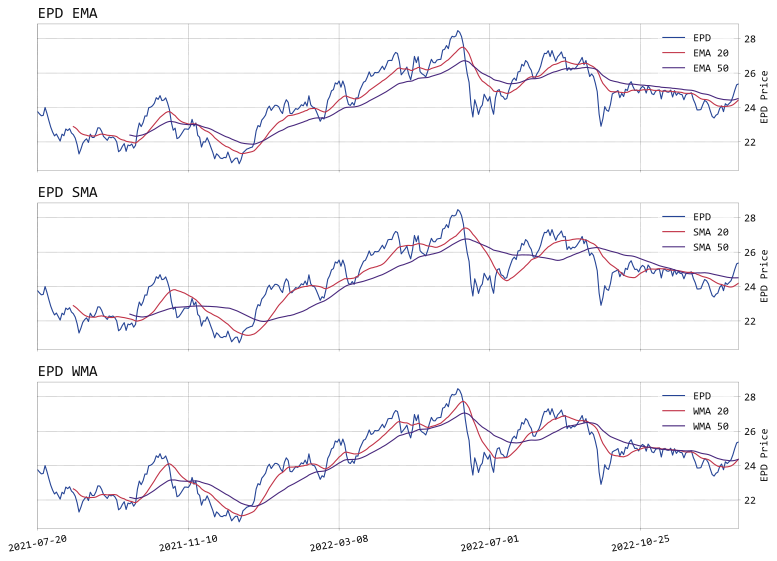

In [169]:
fig, (ax1, ax2, ax3) = plt.subplots(
    nrows=3, ncols=1, figsize=(11, 8), sharex=True, dpi=150
)
openbb.ta.ma(ticker_data["Close"], symbol=symbol, external_axes=[ax1])
openbb.ta.ma(ticker_data["Close"], symbol=symbol, ma_type="SMA", external_axes=[ax2])
openbb.ta.ma(ticker_data["Close"], symbol=symbol, ma_type="WMA", external_axes=[ax3])
fig.tight_layout()
f = io.BytesIO()
fig.savefig(f, format="svg")
ma_chart = f.getvalue().decode("utf-8")

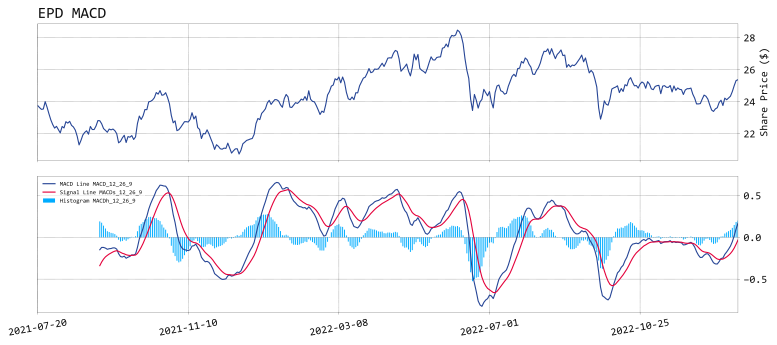

In [170]:
fig, (ax, ax1) = plt.subplots(nrows=2, ncols=1, figsize=(11, 5), sharex=True, dpi=150)
openbb.ta.macd_chart(ticker_data["Close"], symbol=symbol, external_axes=[ax, ax1])
fig.tight_layout()
f = io.BytesIO()
fig.savefig(f, format="svg")
macd_chart = f.getvalue().decode("utf-8")

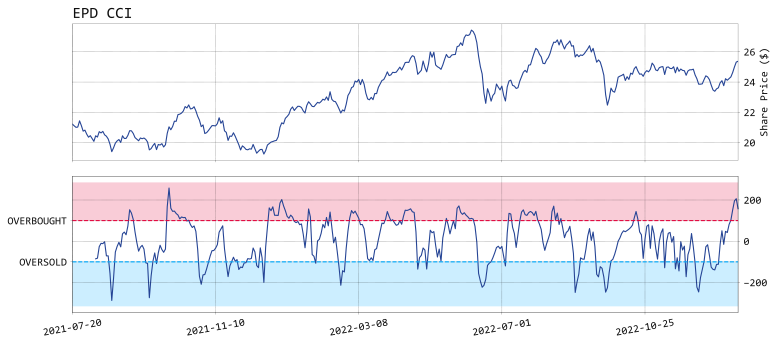

In [171]:
fig, (ax, ax1) = plt.subplots(nrows=2, ncols=1, figsize=(11, 5), sharex=True, dpi=150)
openbb.ta.cci_chart(ticker_data, symbol=symbol, external_axes=[ax, ax1])
fig.tight_layout()
f = io.BytesIO()
fig.savefig(f, format="svg")
cci_chart = f.getvalue().decode("utf-8")

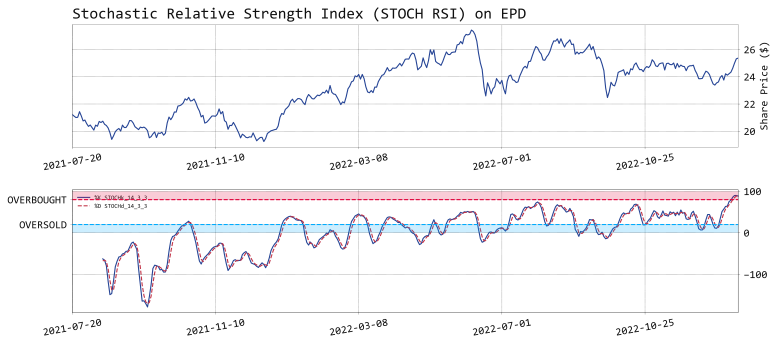

In [172]:
fig, (ax, ax1) = plt.subplots(nrows=2, ncols=1, figsize=(11, 5), dpi=150)
ax2 = ax1.twinx()
openbb.ta.stoch_chart(ticker_data, symbol=symbol, external_axes=[ax, ax1, ax2])
fig.tight_layout()
f = io.BytesIO()
fig.savefig(f, format="svg")
stoch_chart = f.getvalue().decode("utf-8")

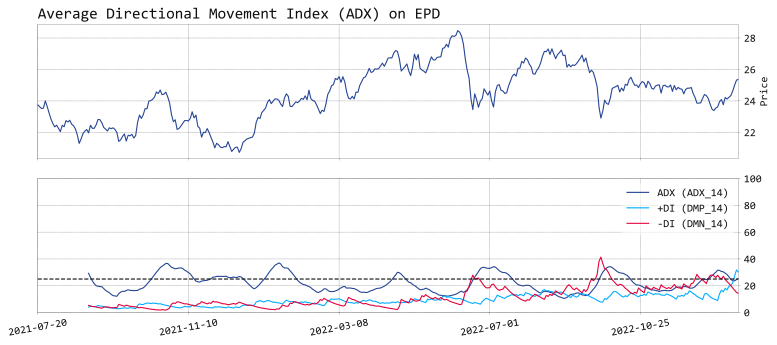

In [173]:
fig, (ax, ax1) = plt.subplots(2, 1, sharex=True, figsize=(11, 5), dpi=150)
openbb.ta.adx_chart(ticker_data, symbol=symbol, external_axes=[ax, ax1])
fig.tight_layout()
f = io.BytesIO()
fig.savefig(f, format="svg")
adx_chart = f.getvalue().decode("utf-8")

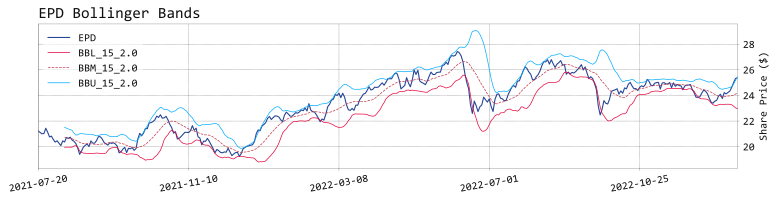

In [174]:
fig, ax = plt.subplots(figsize=(11, 3), dpi=150)
openbb.ta.bbands_chart(ticker_data, symbol=symbol, external_axes=[ax])
fig.tight_layout()
f = io.BytesIO()
fig.savefig(f, format="svg")
bbands_chart = f.getvalue().decode("utf-8")

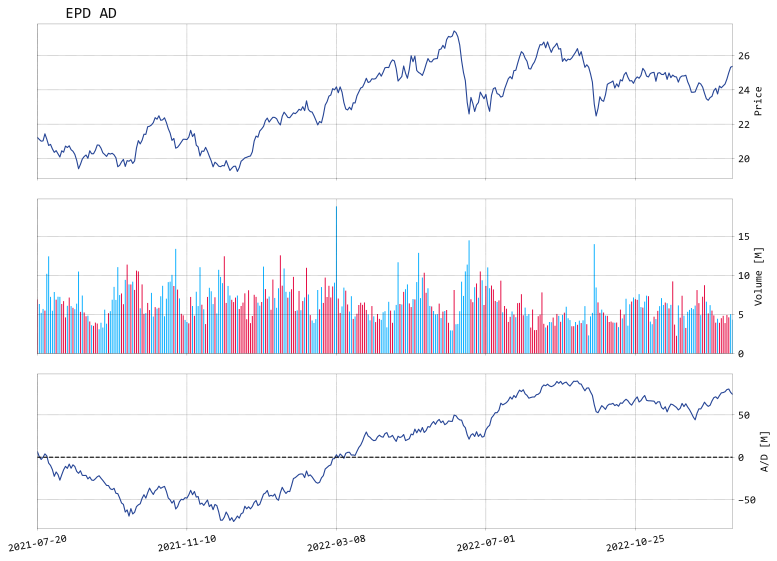

In [175]:
fig, (ax, ax1, ax2) = plt.subplots(3, 1, sharex=True, figsize=(11, 8), dpi=150)
openbb.ta.ad_chart(ticker_data, symbol=symbol, external_axes=[ax, ax1, ax2])
fig.tight_layout()
f = io.BytesIO()
fig.savefig(f, format="svg")
ad_chart = f.getvalue().decode("utf-8")

## Render the report template to a file

In [176]:
body =""
    
img = (
    str(REPOSITORY_DIRECTORY)
    + "/openbb_terminal/reports/templates/OpenBB_reports_logo.png"
)
floppy_disk_img = (
    str(REPOSITORY_DIRECTORY) + "/openbb_terminal/reports/templates/floppy-disc.png"
)

htmlcode = f"""
<!-- TradingView Widget BEGIN -->
    <div class="tradingview-widget-container">
        <div class="tradingview-widget-container__widget"></div>
        <div class="tradingview-widget-copyright"><a href="https://www.tradingview.com/symbols/NYSE-{symbol}/" rel="noopener" target="_blank"><span class="blue-text">AR key facts</span></a> by TradingView</div>
        <script type="text/javascript" src="https://s3.tradingview.com/external-embedding/embed-widget-symbol-profile.js" async>
        {{
        "width": "1085",
        "height": "700",
        "colorTheme": "light",
        "isTransparent": false,
        "symbol": "NYSE:{symbol}",
        "locale": "en"
        }}
        </script>
    </div>
<!-- TradingView Widget END -->
"""

body += widgets.add_tab("Summary", htmlcode, False)

htmlcode = f"""
<!-- TradingView Widget BEGIN -->
<div class="tradingview-widget-container">
  <div id="tradingview_fceac"></div>
  <div class="tradingview-widget-copyright"><a href="https://www.tradingview.com/symbols/NYSE-{symbol}/" rel="noopener" target="_blank"><span class="blue-text">AR stock price</span></a> by TradingView</div>
  <script type="text/javascript" src="https://s3.tradingview.com/tv.js"></script>
  <script type="text/javascript">
  new TradingView.MediumWidget(
    {{
    "symbols": [
        [
        "{long_name}",
        "NYSE:{symbol}|1D"
        ]
    ],
    "chartOnly": false,
    "width": "1085",
    "height": "700",
    "locale": "en",
    "colorTheme": "light",
    "autosize": false,
    "showVolume": false,
    "hideDateRanges": false,
    "hideMarketStatus": false,
    "scalePosition": "right",
    "scaleMode": "Normal",
    "fontFamily": "-apple-system, BlinkMacSystemFont, Trebuchet MS, Roboto, Ubuntu, sans-serif",
    "fontSize": "10",
    "noTimeScale": false,
    "valuesTracking": "1",
    "chartType": "line",
    "container_id": "tradingview_fceac"
    }}
  );
  </script>
</div>
<!-- TradingView Widget END -->
"""

body += widgets.add_tab("Overview", htmlcode, False)

htmlcode = widgets.row([widgets.h(3, "Latest News for " + symbol)])
try:
    for table in tables:
        htmlcode += widgets.row(
            [widgets.h(4, table[1]["title"]) + table[0].to_html(escape=False)]
        )
except:
    pass

htmlcode += widgets.row([widgets.h(3, "Twitter News for " + symbol )])

htmlcode += """
     <div class="tweet-list">
        {% for tweet in tweets %}
        <div class="tweet">
            <div class="tweet-header">
                <img src="{{ tweet.user.profile_image_url }}" alt="{{ tweet.user.name }}'s profile picture">
                <h3>{{ tweet.user.name }}</h3>                   
            </div>       
            <div class="tweet-body">
                <p>{{ tweet.full_text }}</p>
            </div>   
            {% if tweet.entities.media %}
                <div class="tweet-media">
                {% for media in tweet.entities.media %}
                    <img src="{{ media.media_url_https }}" alt="Tweet media">
                {% endfor %}
                </div>
            {% endif %}
            <div class="tweet-footer">
                {% set date = tweet.created_at.strftime('%b %d, %Y at %I:%M %p') %}
                <p>{{ date }}</p>
                <a href="https://twitter.com/{{ tweet.user.screen_name }}/status/{{ tweet.id }}" target="_blank">View on Twitter</a>
            </div>
        </div>
        {% endfor %}
    </div>
        """

body += widgets.add_tab("News and Twitter", htmlcode, False)

htmlcode = widgets.row([widgets.h(3, "Price Target Chart") + price_target_chart])
htmlcode += widgets.row(
    [widgets.h(3, "Analyst Ratings over time") + ratings_over_time_chart]
)
try:
    htmlcode += widgets.row([widgets.h(3, "Analyst Ratings") + df_analyst.to_html()])
except:
    pass
try:
    htmlcode += widgets.row(
        [widgets.h(3, "Analyst Recommendations") + df_rating.to_html()]
    )
except:
    pass

body += widgets.add_tab("Analyst Opinions", htmlcode, False)
htmlcode = f"""
<!-- TradingView Widget BEGIN -->
    <div class="tradingview-widget-container">
        <div class="tradingview-widget-container__widget"></div>
        <div class="tradingview-widget-copyright"><a href="https://www.tradingview.com/symbols/NYSE-{symbol}/financials-overview/" rel="noopener" target="_blank"><span class="blue-text">AR fundamentals</span></a> by TradingView</div>
        <script type="text/javascript" src="https://s3.tradingview.com/external-embedding/embed-widget-financials.js" async>
        {{
        "colorTheme": "light",
        "isTransparent": false,
        "largeChartUrl": "",
        "displayMode": "regular",
        "width": "1085",
        "height": "800",
        "symbol": "NYSE:{symbol}",
        "locale": "en"
        }}
        </script>
    </div>
<!-- TradingView Widget END -->
"""

body += widgets.add_tab("Fundamental Analysis", htmlcode, False)

htmlcode = widgets.row([widgets.h(3, "Put to call ratio") + pcr_chart])
htmlcode += widgets.row(
    [widgets.h(3, "Option Volume for closest expiry date") + vol_chart]
)
htmlcode += widgets.row(
    [widgets.h(3, "Volume and Open Interest for closest expiry date") + voi_chart]
)
try:
    htmlcode += widgets.row([widgets.h(3, "Option Chains") + options_df.to_html()])
except:
    pass
body += widgets.add_tab("Options", htmlcode, False)

htmlcode = widgets.row([net_short_position])
htmlcode += widgets.row([price_vs_short_interest])
body += widgets.add_tab("Shorts", htmlcode, False)

htmlcode = widgets.row(
    [
        widgets.h(3, "Congress trading in the past 12 months for " + symbol)
        + gtrades_chart
    ]
)

htmlcode = widgets.row(
    [
        widgets.h(3, f"Price over the past year for companies similar to {symbol}")
        + historical_similar
    ]
)
htmlcode += widgets.row(
    [
        widgets.h(3, f"Price correlation with similar companies for {symbol}")
        + hcorr_similar
    ]
)
htmlcode += widgets.row(
    [
        widgets.h(3, f"Volume over the past year for companies similar to {symbol}")
        + vol_similar
    ]
)
htmlcode += widgets.row(
    [
        widgets.h(3, f"Sentiment correlation with similar companies for {symbol}")
        + scorr_similar
    ]
)

htmlcode += widgets.row(
    [
        widgets.p(
            "Note that similar companies have been found using openbb.stocks.ca.similar"
        )
    ]
)
body += widgets.add_tab("Comparison", htmlcode, False)

htmlcode = f"""
<!-- TradingView Widget BEGIN -->
    <div class="tradingview-widget-container">
        <div class="tradingview-widget-container__widget"></div>
        <div class="tradingview-widget-copyright"><a href="https://www.tradingview.com/symbols/NYSE-{symbol}/technicals/" rel="noopener" target="_blank"><span class="blue-text">AR stock analysis</span></a> by TradingView</div>
        <script type="text/javascript" src="https://s3.tradingview.com/external-embedding/embed-widget-technical-analysis.js" async>
        {{
        "interval": "1W",
        "width": "1085",
        "isTransparent": false,
        "height": "700",
        "symbol": "NYSE:{symbol}",
        "showIntervalTabs": true,
        "locale": "en",
        "colorTheme": "light"
        }}
        </script>
    </div>
<!-- TradingView Widget END -->
        """


htmlcode += widgets.row([widgets.h(3, f"Moving Averages for {symbol}") + ma_chart])
htmlcode += widgets.row([macd_chart])
htmlcode += widgets.row([ta_rsi])
htmlcode += widgets.row([stoch_chart])
htmlcode += widgets.row([cci_chart])
htmlcode += widgets.row([ad_chart])
htmlcode += widgets.row([bbands_chart])
htmlcode += widgets.row([adx_chart])
body += widgets.add_tab("Technical Analysis", htmlcode, False)

try:
    htmlcode = widgets.row(
        [widgets.h(3, "Last Activity") + df_insider.head(10).to_html(col_space="75px")]
    )
except:
    pass
body += widgets.add_tab("Insider Trading", htmlcode)

htmlcode = widgets.row([bw_year])
htmlcode += widgets.row([bw_month])
body += widgets.add_tab("Quantitative Analysis", htmlcode, False)


htmlcode = widgets.row([finbrain_sentiment])
htmlcode += widgets.row([snews])
htmlcode += widgets.row(
    [
        widgets.h(3, "Interest in " + symbol + " based on google analytics")
        + google_mentions_chart
    ]
)
htmlcode += widgets.row(
    [widgets.h(3, f"Regions with highest interest in {symbol}") + google_regions_chart]
)
try:
    htmlcode += widgets.row(
        [
            widgets.h(3, f"Top queries related to {symbol}")
            + df_related_queries.to_html()
        ]
    )
    htmlcode += widgets.row(
        [
            widgets.h(3, f"Top rising queries related to {symbol}")
            + df_rising_queries.to_html()
        ]
    )
except:
    pass
htmlcode += widgets.row(
    [widgets.h(3, f"Stocktwits sentiment for {symbol}") + stocktwits_sentiment]
)
body += widgets.add_tab("Behavioural Analysis", htmlcode, False)

htmlcode = """
    <iframe src="https://docs.google.com/spreadsheets/d/e/2PACX-1vTzYPt7GjAVk-NLvYrDo5OuxcDuaRFejqZ2iT_l2Y3nkKtAgwNO809hYnZhCIxc8XGQSDuGSfc8ZsAy/pubhtml?widget=true&amp;headers=false" width="1085" height="700"></iframe>
        """

body += widgets.add_tab("GSheets", htmlcode, False)

#This code snippet was extracted from OpenBB widget_helpers.py so that the html can be modified to work with the dashboard
body += """
        <script>
        function dmenu2(evt, menu_name) {
            event.preventDefault();
            var i, tabcontent, tablinks;
            tabcontent = document.getElementsByClassName("tabcontent");
            for (i = 0; i < tabcontent.length; i++) {
                tabcontent[i].style.display = "none";
            }
            tablinks = document.getElementsByClassName("tablinks");
            for (i = 0; i < tablinks.length; i++) {
                tablinks[i].className = tablinks[i].className.replace(" active bg-gradient-primary", "");
            }

            document.getElementById(menu_name).style.display = "block";
            evt.currentTarget.className += " active bg-gradient-primary";

        }
        window.onload = function() {
            dmenu2(event, 'Summary');
        };
        </script>"""

f = open("public/templates/report.j2", "r")
template = Template(f.read())
report= template.render(title=report_name, stylesheet=stylesheet, body=body + "</html>")

# to save the results
with open("public/templates/" + report_name + ".html", "w", encoding="utf-8") as fh:
    fh.write(report)

dotenv.load_dotenv(USER_ENV_FILE)
cfg.theme = TerminalStyle(
    os.getenv("OPENBB_MPLSTYLE") or "dark",
    os.getenv("OPENBB_MPFSTYLE") or "dark",
    os.getenv("OPENBB_RICHSTYLE") or "dark",
)